# Введение в машинное обучение

## Семинар #8

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Отбор и генерация признаков (Feature Engineering). Поиск и оптимизация модели (Grid Search).

# 1. Отбор и генерация признаков: Feature Engineering


Feature Engineering, как мы уже знаем из предыдущей лекции - очень общий термин, который включает в себя:
    a. преобработку данных и составление датасета
    - перевод категориальных признаков в бинарные
    - заполнение пропусков данных
    - снижение размерности данных (выбор характеристик)
    - генерацию новых признаков из набора данных. включает: генерацию новых характеристик исходя из знания предметной области, или геометрические методы снижения размерности данных
    
### Источники:
    
   1. Размышления на тему https://habr.com/ru/company/mlclass/blog/248129/,
    https://habr.com/ru/company/mlclass/blog/249759/
   2. Для датасета Титаник https://habr.com/ru/company/otus/blog/433084/
   3. Лекция https://www.youtube.com/watch?v=leTyvBPhYzw

In [12]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

## Пример 1: Выжившие в катастрофе Титаника

Соревнование: 
Источник: https://www.kaggle.com/kernels/scriptcontent/13445201/download

In [ ]:
import os

os.listdir()

In [ ]:
os.chdir('feature_engineering_for_titanic/')
%run -i titanic.ipynb

## Пример 2: Крестики - нолики

Конкурс: https://datahub.io/machine-learning/tic-tac-toe-endgame


Подходы к решению: https://towardsdatascience.com/tic-tac-toe-creating-unbeatable-ai-with-minimax-algorithm-8af9e52c1e7d

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from mlxtend.plotting import plot_decision_regions

In [8]:
#os.chdir('../')

In [9]:
data = pd.read_csv('tic-tac-toe_csv.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
156,x,o,o,x,x,b,o,b,x,True
298,o,x,x,o,x,x,x,o,o,True
473,o,b,b,x,x,x,o,x,o,True


In [10]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
218,1,-1,0,0,1,-1,-1,1,1
381,-1,-1,1,-1,1,1,1,1,-1
455,-1,0,1,0,-1,-1,1,1,1
469,-1,0,-1,0,1,-1,1,1,1


In [13]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    score = cross_val_score(clf, X, y, cv=5).mean()
    name = clf.__class__.__name__
    print(f"{name} scored {round(score, 3)}")

RandomForestClassifier scored 0.889
SVC scored 0.941
LogisticRegression scored 0.983


# 2. Оптимизация модели: поиск гиперпараметров

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'kernel':( 'linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1, 0.2, 0.21, 0.23, 0.25, 0.3, 0.4, 0.5, 1,  5]}
svm_new = GridSearchCV(svm, parameters, cv=5)
svm_new.fit(X, y)
print(f"Best score for SVM {svm_new.best_score_}")
print(f"Best params for SVM {svm_new.best_params_}")


Best score for SVM 0.9906054279749478
Best params for SVM {'C': 0.21, 'kernel': 'poly'}


C:\01Dev\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Вопрос**: по какому критерию происходит выбор модели и гиперпараметров?

In [15]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=404)

X_new = X
X_new['sum'] = X.sum(1)
score = cross_val_score(rf, X_new, y, cv=5).mean()
name = rf.__class__.__name__
print(f"{name} scored {round(score, 3)}")

# The game begins with 'x' and also when 'x'-player wins the last posted symbol is 'x'. 
# So, in major part of game ways when 'x' wins, the number of 'x' will be bigger than number of 'o' . 
# It means that sum in rows could be used as new feature. 

RandomForestClassifier scored 0.976


In [16]:
X_features = pd.DataFrame()
X_features['rowT'] = X['TL'] + X['TM'] + X['TR']
X_features['rowM'] = X['ML'] + X['MM'] + X['MR']
X_features['rowB'] = X['BL'] + X['BM'] + X['BR']
X_features['colL'] = X['TL'] + X['ML'] + X['BL']
X_features['colM'] = X['TM'] + X['MM'] + X['BM']
X_features['colR'] = X['TR'] + X['MR'] + X['BR']
X_features['diag1'] = X['TL'] + X['MM'] + X['BR']
X_features['diag2'] = X['BL'] + X['MM'] + X['TR']

In [17]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=404)

score = cross_val_score(rf, X_features, y, cv=5).mean()
name = rf.__class__.__name__
print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.983


## Toy example 3: использование полиномиальных характеристик

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.2, random_state=404)

C:\01Dev\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\01Dev\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\01Dev\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


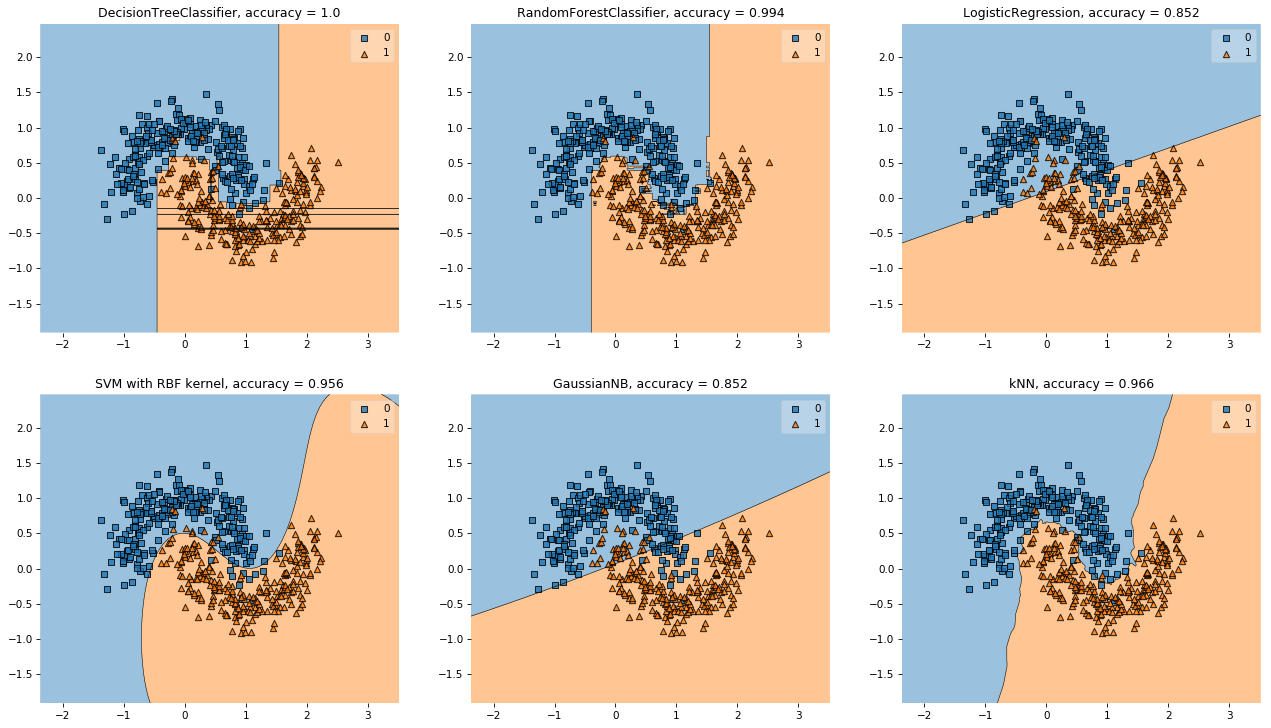

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

clfs = [DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        SVC(),
        GaussianNB(),
        KNeighborsClassifier()]
        

fig, axes = plt.subplots(
    ncols=(len(clfs) + 1)// 2,
    nrows=2, figsize=(6 * ((len(clfs) + 1)) // 2, 12),
    dpi=75
)

labels = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression',
         'SVM with RBF kernel', 'GaussianNB', 'kNN']

for clf, ax, label in zip(clfs, axes.flat, labels):
    clf.fit(X, y)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=1, ax=ax)
    accuracy = clf.score(X, y)
    ax.set_title(label + ', accuracy = ' + str(accuracy))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from sklearn.pipeline import Pipeline

polyTransform = PolynomialFeatures(degree=2)
scaler = StandardScaler()
X_poly = polyTransform.fit_transform(X)
X_poly = scaler.fit_transform(X_poly)

clfTree = Pipeline([('polyTransform', PolynomialFeatures(degree=2)), 
                     ('scaler', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier(max_depth=4))])

clfForest = Pipeline([('polyTransform', PolynomialFeatures(degree=2)), 
                     ('scaler', StandardScaler()),
                ('random_forest', RandomForestClassifier(n_estimators=25, max_depth=3))])

clfs = [clfTree, clfForest]

fig, axes = plt.subplots(
    ncols=2, nrows=1, figsize=(18, 8),
    dpi=75
)

labels = ['DecisionTreeClassifier', 'RandomForestClassifier']

for clf, ax, label in zip(clfs, axes.flat, labels):
    clf.fit(X, y)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=1, ax=ax)
    accuracy = clf.score(X, y)
    ax.set_title(label + ', accuracy = ' + str(accuracy))


### Задача 1: Мультикласс классификация для конкурса предсказания Состава для стекла

Данные: https://www.kaggle.com/uciml/glass#glass.csv

In [ ]:
data = pd.read_csv('glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import time

clfs = [DecisionTreeClassifier(max_depth = 7), 
        RandomForestClassifier(n_estimators=100, max_depth=3),
        KNeighborsClassifier(n_neighbors=5),
        LogisticRegression()]
names = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic regression']

Scores = pd.DataFrame({'method':['Multiclass', 'OneVsRest', 'OneVsOne']})
Times = pd.DataFrame({'method':['Multiclass', 'OneVsRest', 'OneVsOne']})

for clf, name in zip(clfs, names):
    scores = []
    times = []
    start = time.time()
    score = cross_val_score(estimator=clf, X=X, y=y, scoring='f1_macro', cv=5).mean()
    end = time.time()
    times.append(end - start)
    scores.append(score)
    
    clf = OneVsRestClassifier(clf)
    start = time.time()
    score = cross_val_score(estimator=clf, X=X, y=y, scoring='f1_macro', cv=5).mean()
    end = time.time()
    times.append(end - start)
    scores.append(score)
    
    clf = OneVsOneClassifier(clf)
    start = time.time()
    score = cross_val_score(estimator=clf, X=X, y=y, scoring='f1_macro', cv=5).mean()
    end = time.time()
    times.append(end - start)
    scores.append(score)
    
    Scores[name] = scores
    Times[name] = times

In [ ]:
Scores

In [ ]:
Times

### Задача 2: Мультикласс классификация. Grid search для мультиклассовой классификации